<a href="https://colab.research.google.com/github/mana-nara/stock-market-prediction/blob/main/Stock_Market_Prediction_using_LSTM_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from pandas_datareader import data as wb
import yfinance as yf


Initially, we will utilize yFinance, an open-source Python library, to fetch stock data from Yahoo Finance. Our objective is to obtain the closing stock prices of AAPL for the past 12 years.

In [ ]:
df = yf.download('TSLA',start = '2010-01-01',end = '2023-01-01')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
df.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300
2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157777300


In [ ]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


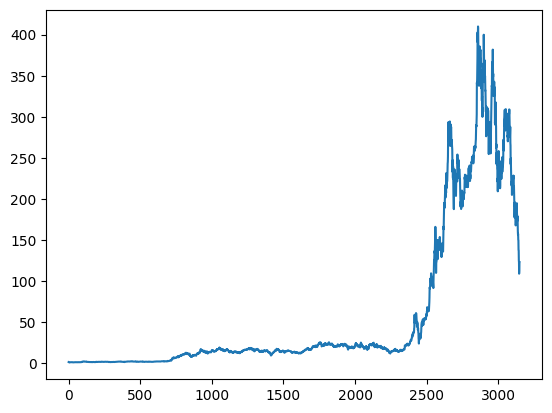

In [ ]:
plt.plot(df.Close)

In [ ]:
df

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
3145,126.370003,128.619995,121.019997,123.150002,166989700
3146,117.500000,119.669998,108.760002,109.099998,208643400
3147,110.349998,116.269997,108.239998,112.709999,221070500
3148,120.389999,123.570000,117.500000,121.820000,221923300


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3145    234.019467
3146    232.024134
3147    230.269534
3148    228.583501
3149    226.981967
Name: Close, Length: 3150, dtype: float64

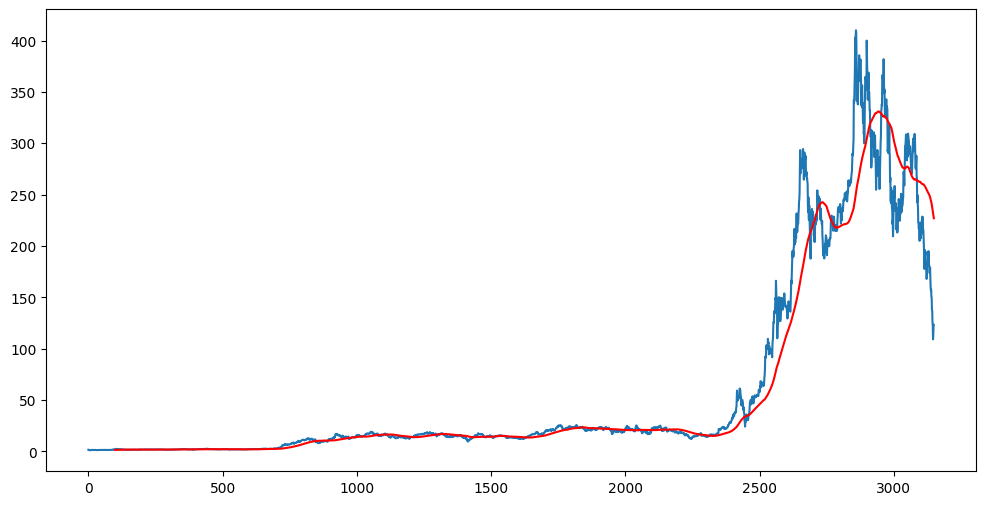

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3145    255.097317
3146    254.317234
3147    253.603501
3148    252.876117
3149    252.091634
Name: Close, Length: 3150, dtype: float64

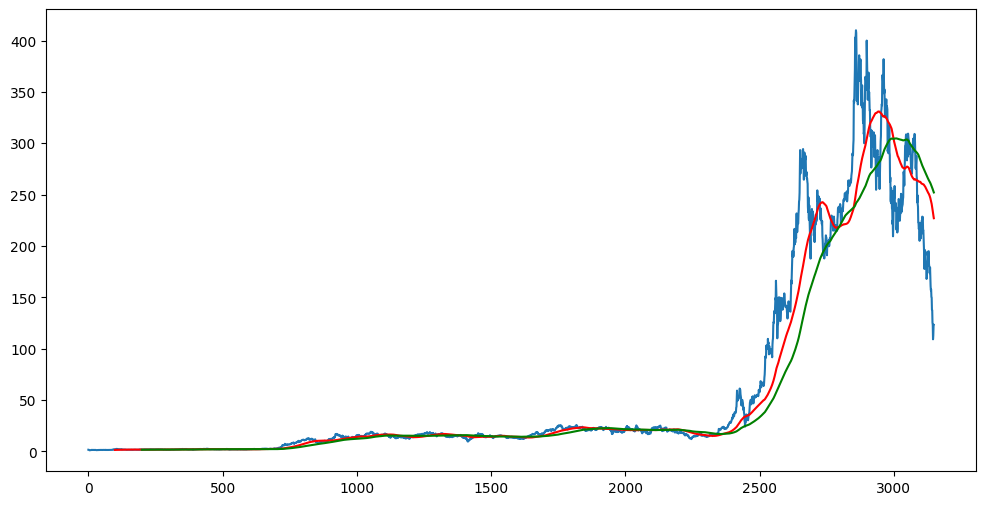

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')
plt.plot(ma200,'green')

In [ ]:
df.shape

(3150, 5)

In [ ]:
#We will now split the data into training and testing
dataTraining = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
dataTesting = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(dataTraining.shape)
print(dataTesting.shape)

(2205, 1)
(945, 1)


In [ ]:
dataTraining.head()

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [ ]:
dataTesting.head()

,Close
2205,19.454000
2206,17.851999
2207,18.330667
2208,18.213333
2209,18.153999


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
dataTrainingArray = scaler.fit_transform(dataTraining)
dataTrainingArray

array([[0.02191227],
       [0.02174975],
       [0.01668473],
       ...,
       [0.71522207],
       [0.74046587],
       [0.73152757]])

In [ ]:
x_train = []
y_train = []

for i in range(100,dataTrainingArray.shape[0]):
  x_train.append(dataTrainingArray[i-100: i])
  y_train.append(dataTrainingArray[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)


In [ ]:
#We will now develop our Machine Learning model

In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [ ]:
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
66/66 [==============================] - 32s 376ms/step - loss: 0.0737
Epoch 2/50
66/66 [==============================] - 23s 349ms/step - loss: 0.0136
Epoch 3/50
66/66 [==============================] - 24s 359ms/step - loss: 0.0122
Epoch 4/50
66/66 [==============================] - 24s 372ms/step - loss: 0.0112
Epoch 5/50
66/66 [==============================] - 25s 378ms/step - loss: 0.0113
Epoch 6/50
66/66 [==============================] - 25s 374ms/step - loss: 0.0086
Epoch 7/50
66/66 [==============================] - 25s 381ms/step - loss: 0.0090
Epoch 8/50
66/66 [==============================] - 24s 370ms/step - loss: 0.0089
Epoch 9/50
66/66 [==============================] - 24s 357ms/step - loss: 0.0087
Epoch 10/50
66/66 [==============================] - 23s 352ms/step - loss: 0.0074
Epoch 11/50
66/66 [==============================] - 24s 368ms/step - loss: 0.0072
Epoch 12/50
66/66 [==============================] - 23s 352ms/step - loss: 0.0076
Epoch 13/50
6

In [ ]:
model.save('keras_model.h5')

In [ ]:
past100days = dataTraining.tail(100)

In [ ]:
final_df = past100days.append(dataTesting, ignore_index = True)

<ipython-input-104-653240c9f41b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past100days.append(dataTesting, ignore_index = True)


In [ ]:
final_df.head()

,Close
0,22.737333
1,23.210667
2,23.426666
3,23.367332
4,22.085333


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02714812],
       [0.02833728],
       [0.02887994],
       ...,
       [0.25318813],
       [0.27607536],
       [0.27949211]])

In [ ]:
input_data.shape

(1045, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [ ]:
x_test, y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(945, 100, 1)
(945,)


In [ ]:
#We will now make predictions on the data
y_predicted = model.predict(x_test)

30/30 [==============================] - 3s 93ms/step


In [ ]:
y_predicted.shape

(945, 1)

In [ ]:
y_test

array([0.01889934, 0.0148746 , 0.01607717, 0.01578239, 0.01563332,
       0.0162614 , 0.0149818 , 0.0148612 , 0.01464012, 0.01580919,
       0.01545244, 0.01579244, 0.01403214, 0.01422475, 0.01334711,
       0.01149972, 0.0094078 , 0.010468  , 0.01000238, 0.00921854,
       0.01090849, 0.01273913, 0.01279105, 0.01140425, 0.01103243,
       0.01055342, 0.0101414 , 0.00804612, 0.00893381, 0.00887351,
       0.00826721, 0.00536967, 0.00442001, 0.00437311, 0.00230464,
       0.0027669 , 0.00195291, 0.00162966, 0.00182395, 0.00154927,
       0.00103675, 0.        , 0.00245035, 0.00295114, 0.00451882,
       0.00427597, 0.00567952, 0.00638632, 0.00507321, 0.00585203,
       0.00602119, 0.00771449, 0.00766592, 0.00794898, 0.00680838,
       0.00718356, 0.00748169, 0.00683184, 0.00674976, 0.0073477 ,
       0.00745154, 0.00807292, 0.0076341 , 0.0093676 , 0.00906612,
       0.00860386, 0.00855696, 0.0100409 , 0.00998731, 0.01107263,
       0.01248288, 0.01229529, 0.01271066, 0.01248957, 0.01326

In [ ]:
y_predicted

array([[0.04408243],
       [0.04405698],
       [0.04404625],
       [0.04404736],
       [0.04405913],
       [0.04407927],
       [0.04410496],
       [0.04413477],
       [0.04416555],
       [0.04419476],
       [0.0442194 ],
       [0.04423878],
       [0.04425213],
       [0.04426035],
       [0.04426226],
       [0.04425794],
       [0.04424736],
       [0.04422948],
       [0.04420111],
       [0.04416165],
       [0.04411134],
       [0.04404953],
       [0.04397789],
       [0.04390088],
       [0.04381895],
       [0.04373723],
       [0.04366013],
       [0.04359019],
       [0.04352954],
       [0.04347628],
       [0.04343   ],
       [0.04339001],
       [0.04335633],
       [0.04332557],
       [0.0432941 ],
       [0.04326004],
       [0.04321954],
       [0.04317155],
       [0.04311511],
       [0.04305026],
       [0.04297844],
       [0.04290169],
       [0.04282281],
       [0.04274139],
       [0.04266086],
       [0.04258344],
       [0.04251364],
       [0.042

In [ ]:
scaler.scale_

array([0.00251232])

In [ ]:
scaleFactor = 1/0.00682769
y_predicted = y_predicted * scaleFactor
y_test = y_test * scaleFactor

Text(0, 0.5, 'Price')

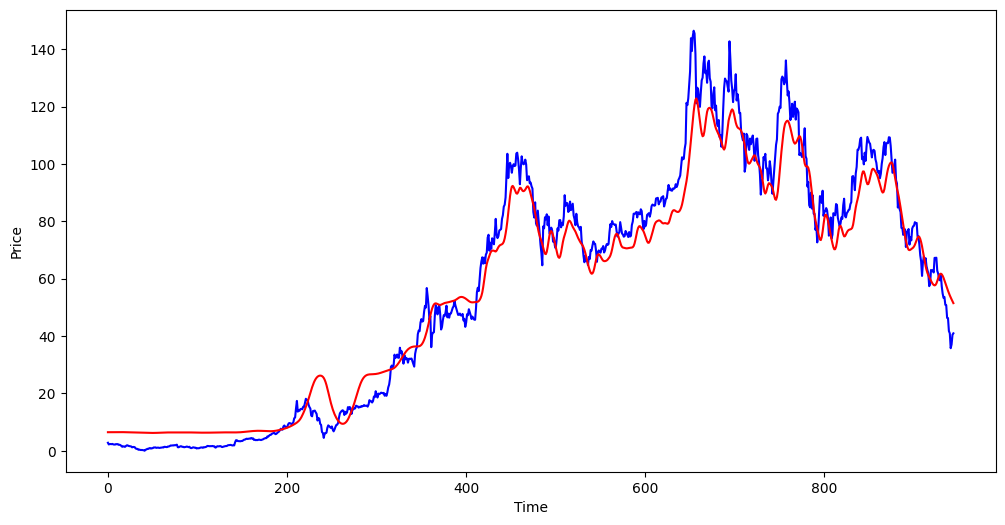

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'blue',label = 'Original Price')
plt.plot(y_predicted, 'red', label = 'Predicted Price')
plt.xlabel("Time")
plt.ylabel("Price")